In [113]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [114]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [115]:
df = pd.read_csv("../Python/Output/UncertainSin_18.txt", sep='\t')
df.head()

,Order,Index,Sin Value,Sin Uncertainty,Sin Normalized Error,Cos Value,Cos Uncertainty,Cos Normalized Error,Error Value,Error Uncertainty,Normalized Error
0,0,0,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000
1,1,65536,0.707107,7.850444e-17,0.000000,0.707107,7.850444e-17,0.0,2.220446e-16,1.812974e-16,1.224754
2,2,32768,0.382683,6.526114e-17,-0.850600,0.923880,8.981547e-17,0.0,0.000000e+00,1.854770e-16,0.000000
3,3,16384,0.195090,1.168750e-16,0.474962,0.980785,9.265520e-17,0.0,0.000000e+00,1.980826e-16,0.000000
4,4,8192,0.098017,2.365415e-16,0.176009,0.995185,9.337841e-17,0.0,0.000000e+00,2.019959e-16,0.000000


In [116]:
df['Order'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17], dtype=int64)

In [117]:
df['arc'] = df['Index'] / (1 << 17) * math.pi
df['lib error'] = np.sin(df['arc']) ** 2 + np.cos(df['arc']) ** 2 - 1
df.head()

,Order,Index,Sin Value,Sin Uncertainty,Sin Normalized Error,Cos Value,Cos Uncertainty,Cos Normalized Error,Error Value,Error Uncertainty,Normalized Error,arc,lib error
0,0,0,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
1,1,65536,0.707107,7.850444e-17,0.000000,0.707107,7.850444e-17,0.0,2.220446e-16,1.812974e-16,1.224754,1.570796,0.000000e+00
2,2,32768,0.382683,6.526114e-17,-0.850600,0.923880,8.981547e-17,0.0,0.000000e+00,1.854770e-16,0.000000,0.785398,2.220446e-16
3,3,16384,0.195090,1.168750e-16,0.474962,0.980785,9.265520e-17,0.0,0.000000e+00,1.980826e-16,0.000000,0.392699,0.000000e+00
4,4,8192,0.098017,2.365415e-16,0.176009,0.995185,9.337841e-17,0.0,0.000000e+00,2.019959e-16,0.000000,0.196350,0.000000e+00


# vs Order

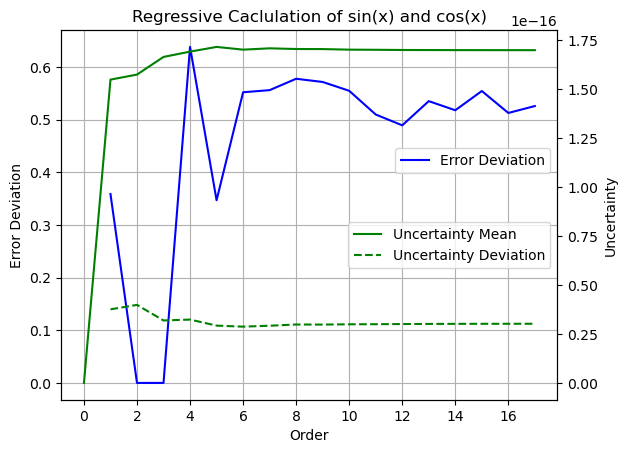

In [118]:
column = 'Normalized Error'
column2 = 'Error Uncertainty'

fig, ax = plt.subplots()
ax.set_title(f'Regressive Caclulation of sin(x) and cos(x)')
ax.set_xlabel('Order')
ax.set_xticks(range(0, 18, 2))
ax.set_ylabel('Error Deviation')
plt.grid(True)

dfMean = df[['Order', column]].groupby('Order').mean()
dfDev = df[['Order', column]].groupby('Order').std()
ax.plot(dfDev.index, dfDev[column], 'b-', label=f'Error Deviation')

ax2 = ax.twinx()
ax2.set_ylabel('Uncertainty')
dfMean = df[['Order', column2]].groupby('Order').mean()
dfDev = df[['Order', column2]].groupby('Order').std()
ax2.plot(dfMean.index, dfMean[column2], 'g-', label=f'Uncertainty Mean')
ax2.plot(dfDev.index, dfDev[column2], 'g--', label=f'Uncertainty Deviation')

ax.legend(bbox_to_anchor=(1.0, 0.7))
ax2.legend(bbox_to_anchor=(1.0, 0.5))

In [119]:
def PlotMeanDev(column, logy=True):
    fig, ax = plt.subplots()
    dfMean = df[['Order', column]].groupby('Order').mean()
    dfDev = df[['Order', column]].groupby('Order').std()
    ax.set_title(column)
    ax.set_xlabel('Order')
    if logy:
        ax.set_yscale('log')
    plt.grid(True)
    ax.plot(dfMean.index, dfMean[column], label='Mean')
    ax.plot(dfDev.index, dfDev[column], label='Deviation')
    ax.legend(bbox_to_anchor=(1.4, 1.0))

In [120]:
def PlotMeanDev2(column, column2, logy=True):
    fig, ax = plt.subplots()
    ax.set_title(f'{column} vs {column2}')
    ax.set_xlabel('Order')
    ax.set_xticks(range(0,17,2))
    if logy:
        ax.set_yscale('log')
    plt.grid(True)
    dfMean = df[['Order', column]].groupby('Order').mean()
    dfDev = df[['Order', column]].groupby('Order').std()
    ax.plot(dfMean.index, dfMean[column], 'b-', label=f'{column} Mean')
    ax.plot(dfDev.index, dfDev[column], 'b--', label=f'{column} Deviation')
    dfMean = df[['Order', column2]].groupby('Order').mean()
    dfDev = df[['Order', column2]].groupby('Order').std()
    ax.plot(dfMean.index, dfMean[column2], 'g-', label=f'{column2} Mean')
    ax.plot(dfDev.index, dfDev[column2], 'g--', label=f'{column2} Deviation')
    ax.legend(bbox_to_anchor=(1.0, 1.0))

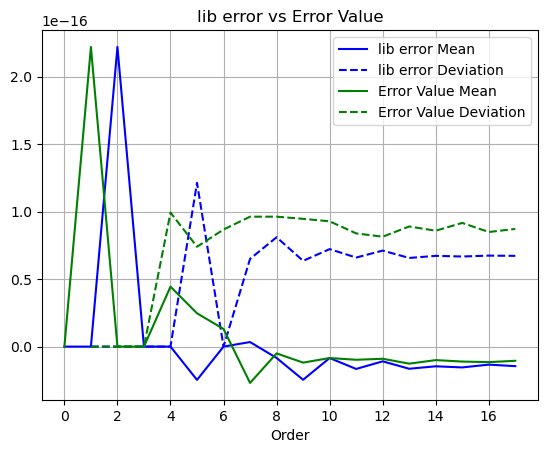

In [121]:
PlotMeanDev2('lib error', 'Error Value', logy=False)

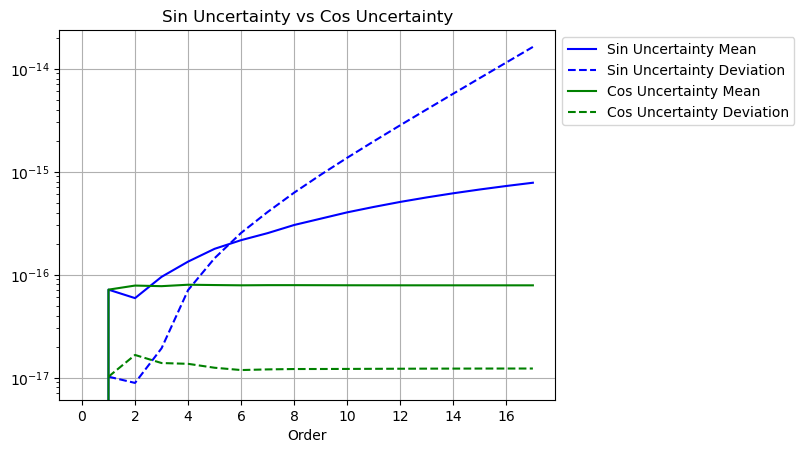

In [122]:
PlotMeanDev2('Sin Uncertainty', 'Cos Uncertainty')

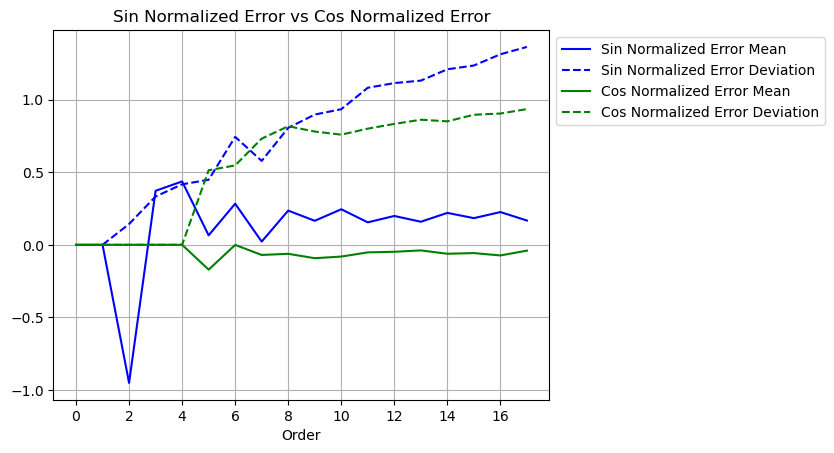

In [123]:
PlotMeanDev2('Sin Normalized Error', 'Cos Normalized Error', logy=False)

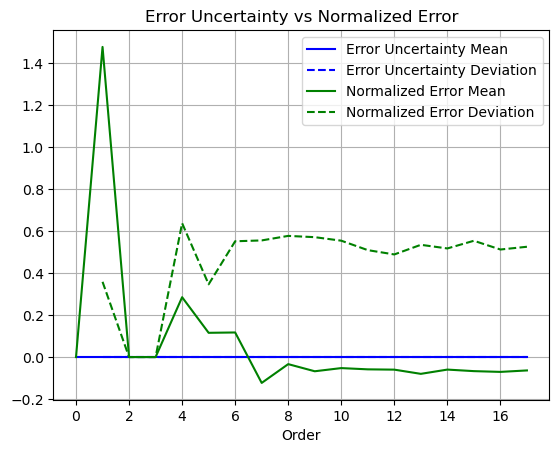

In [124]:
PlotMeanDev2('Error Uncertainty', 'Normalized Error', logy=False)

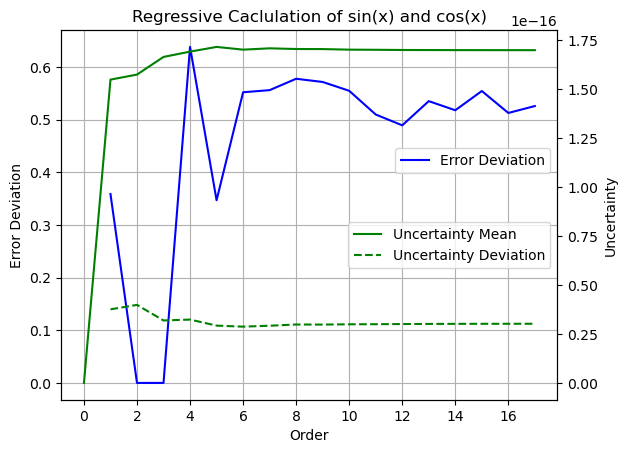

In [125]:
column = 'Normalized Error'
column2 = 'Error Uncertainty'

fig, ax = plt.subplots()
ax.set_title(f'Regressive Caclulation of sin(x) and cos(x)')
ax.set_xlabel('Order')
ax.set_xticks(range(0, 18, 2))
ax.set_ylabel('Error Deviation')
plt.grid(True)

dfMean = df[['Order', column]].groupby('Order').mean()
dfDev = df[['Order', column]].groupby('Order').std()
ax.plot(dfDev.index, dfDev[column], 'b-', label=f'Error Deviation')

ax2 = ax.twinx()
ax2.set_ylabel('Uncertainty')
dfMean = df[['Order', column2]].groupby('Order').mean()
dfDev = df[['Order', column2]].groupby('Order').std()
ax2.plot(dfMean.index, dfMean[column2], 'g-', label=f'Uncertainty Mean')
ax2.plot(dfDev.index, dfDev[column2], 'g--', label=f'Uncertainty Deviation')

ax.legend(bbox_to_anchor=(1.0, 0.7))
ax2.legend(bbox_to_anchor=(1.0, 0.5))

In [126]:
df[df['Order']==17]['Normalized Error'].std()

0.5257998920475131

In [127]:
df[df['Order']==16]['Normalized Error'].std()

0.5126674544394253

# Histogram

In [128]:
def PlotHisto(column, order, bins):
    fig, ax = plt.subplots()
    ax.set_title(f'Histogram of {column} for order {order}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    plt.grid(True)
    df[(df['Order']==order)].hist(column=column, bins=bins, ax=ax)

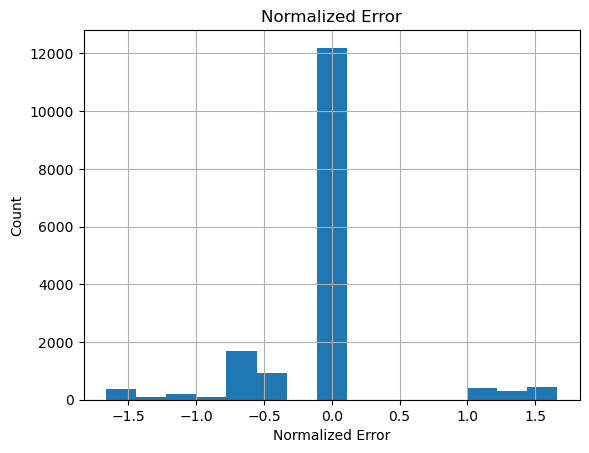

In [129]:
PlotHisto('Normalized Error', 16, 15)

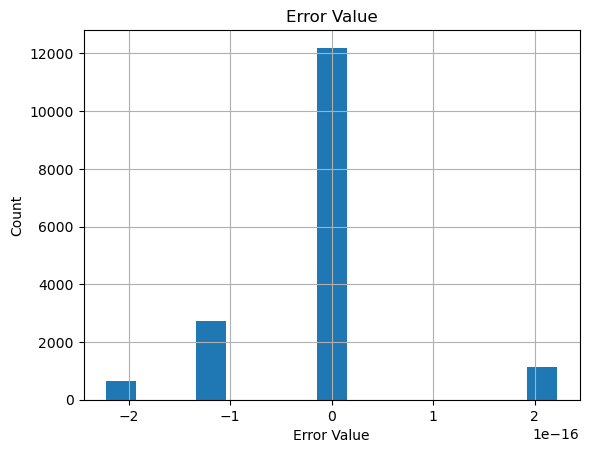

In [130]:
PlotHisto('Error Value', 16, 15)

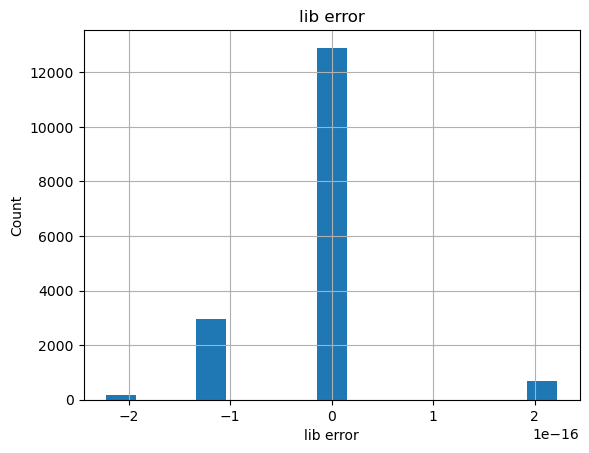

In [131]:
PlotHisto('lib error', 16, 15)

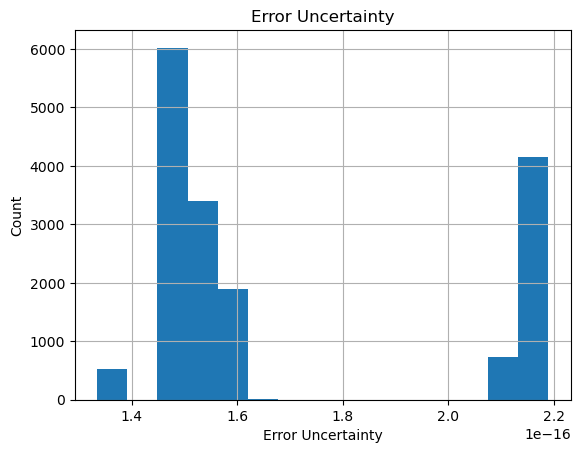

In [132]:
PlotHisto('Error Uncertainty', 16, 15)

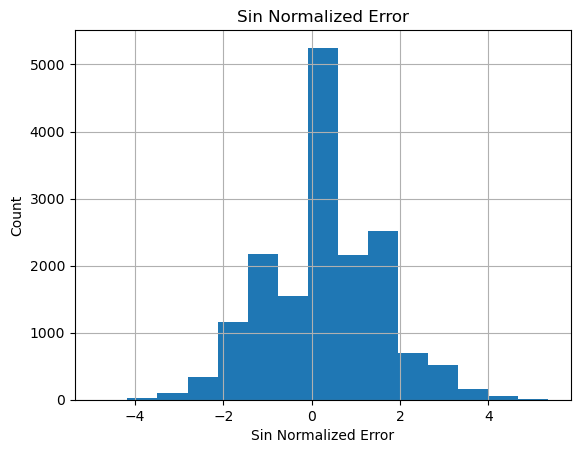

In [133]:
PlotHisto('Sin Normalized Error', 16, 15)

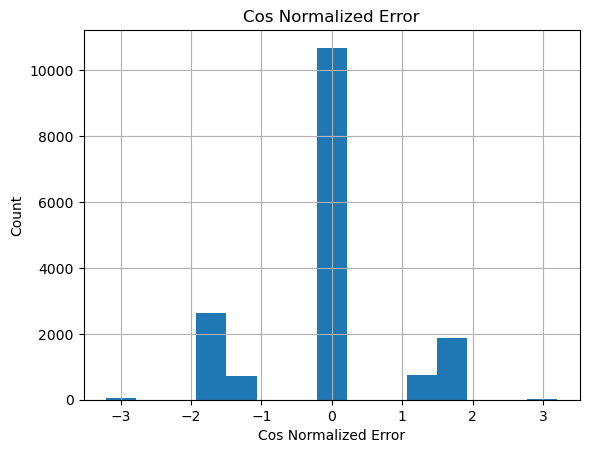

In [134]:
PlotHisto('Cos Normalized Error', 16, 15)

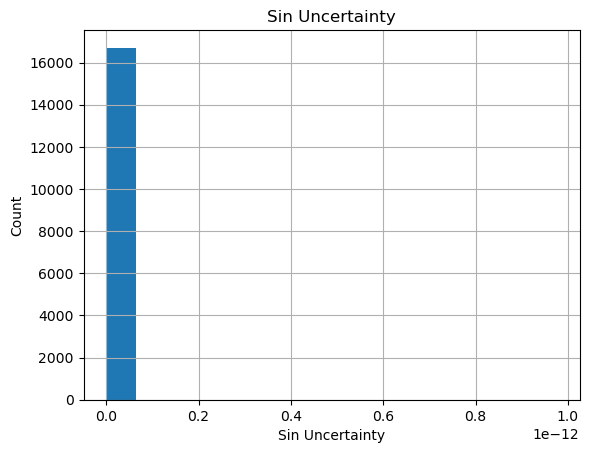

In [135]:
PlotHisto('Sin Uncertainty', 16, 15)

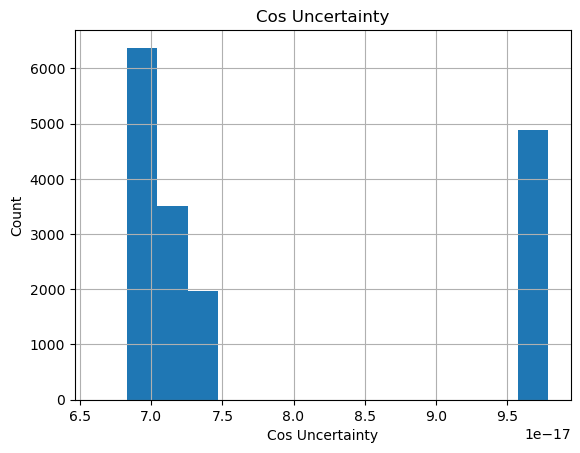

In [136]:
PlotHisto('Cos Uncertainty', 16, 15)

# Profile

In [137]:
df = pd.read_csv("../Python/Output/UncertainSin_6.txt", sep='\t')
df.head()

,Order,Index,Sin Value,Sin Uncertainty,Sin Normalized Error,Cos Value,Cos Uncertainty,Cos Normalized Error,Error Value,Error Uncertainty,Normalized Error
0,0,0,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000
1,1,16,0.707107,6.409876e-17,0.000000,0.707107,6.409876e-17,0.0,2.220446e-16,1.281975e-16,1.732051
2,2,8,0.382683,5.273153e-17,-1.052713,0.923880,6.640403e-17,0.0,0.000000e+00,1.291658e-16,0.000000
3,3,4,0.195090,8.658908e-17,0.641087,0.980785,6.629588e-17,0.0,0.000000e+00,1.343611e-16,0.000000
4,4,2,0.098017,1.692811e-16,0.245942,0.995185,6.622694e-17,0.0,0.000000e+00,1.359291e-16,0.000000


In [138]:
df['arc'] = df['Index'] / (1 << 6) * math.pi
df['lib error'] = np.sin(df['arc']) ** 2 + np.cos(df['arc']) ** 2 - 1
df = df.sort_values("arc")
df.head()

,Order,Index,Sin Value,Sin Uncertainty,Sin Normalized Error,Cos Value,Cos Uncertainty,Cos Normalized Error,Error Value,Error Uncertainty,Normalized Error,arc,lib error
0,0,0,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0
5,5,1,0.049068,3.374479e-16,-0.637449,0.998795,6.620750e-17,0.0,0.000000e+00,1.363384e-16,0.000000,0.049087,0.0
4,4,2,0.098017,1.692811e-16,0.245942,0.995185,6.622694e-17,0.0,0.000000e+00,1.359291e-16,0.000000,0.098175,0.0
6,5,3,0.146730,1.688658e-16,0.493094,0.989177,6.877824e-17,0.0,2.220446e-16,1.448108e-16,1.533343,0.147262,0.0
3,3,4,0.195090,8.658908e-17,0.641087,0.980785,6.629588e-17,0.0,0.000000e+00,1.343611e-16,0.000000,0.196350,0.0


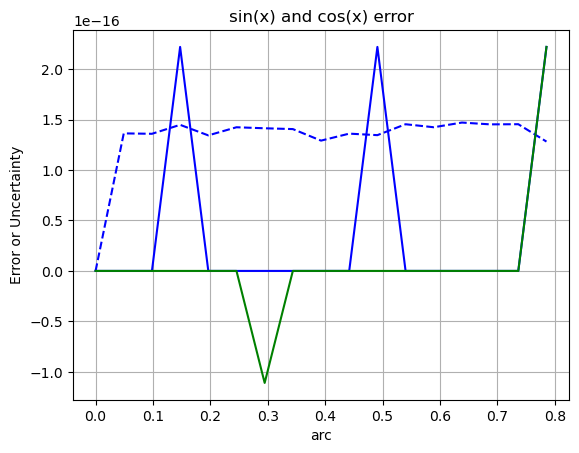

In [139]:
fig, ax = plt.subplots()
ax.set_title(f'sin(x) and cos(x) error')
ax.set_xlabel('arc')
ax.set_ylabel('Error or Uncertainty')
plt.grid(True)

ax.plot(df['arc'], df['Error Value'], 'b-', label='Error Value')
ax.plot(df['arc'], df['Error Uncertainty'], 'b--', label='Error Uncertainty')
ax.plot(df['arc'], df['lib error'], 'g-', label='lib error')